In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN,GRU,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [14]:
# Load the dataset
df = pd.read_csv('..//..//dataset//final_dataset.csv')  


# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(320000, 1, 6) (320000,) (400000, 1, 6)


# Model

In [16]:
def build_drnn_lstm():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(SimpleRNN(units=100, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, activation='relu',return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, ))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mse', 'mae'])
    
    return model


In [17]:
from tensorflow.keras.callbacks import  ModelCheckpoint

# Model checkpoint callback
best_weights_filepath ='..//models//rnn_lstm.keras'

model_checkpoint = ModelCheckpoint(
    best_weights_filepath,  
    monitor='val_mse',  
    mode='min',       
    save_best_only=True,   
    verbose=1
)

In [18]:
# Instantiate and train the model
model = build_drnn_lstm()
import time
batch_size = X_train.shape[0]  # Use full dataset per batch to match experimental setup
start_time=time.time()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    verbose=1,
    callbacks=[model_checkpoint],
    validation_data=(X_test, y_test),
)
end_time = time.time()

Epoch 1/50
2498/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0548 - mae: 0.0406 - mse: 0.0181
Epoch 1: val_mse improved from inf to 0.00000, saving model to ..//models//rnn_lstm.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - loss: 0.0548 - mae: 0.0405 - mse: 0.0181 - val_loss: 1.5128e-06 - val_mae: 1.5074e-06 - val_mse: 2.6242e-11
Epoch 2/50
2493/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5640e-04 - mae: 5.4234e-05 - mse: 2.5938e-05
Epoch 2: val_mse improved from 0.00000 to 0.00000, saving model to ..//models//rnn_lstm.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.5627e-04 - mae: 5.4191e-05 - mse: 2.5908e-05 - val_loss: 2.4684e-07 - val_mae: 2.4760e-07 - val_mse: 3.0248e-12
Epoch 3/50
2498/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9789e-05 - mae: 2.4911e-05 - mse: 1.2637e-05
Epoch 3: val_mse improved from 0.00000 to 0.00000, saving model to ..//models//rnn_lstm.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 8.9819e-05 - mae: 2.4921e-05 - ms

In [19]:
# Calculate total training time
total_training_time = end_time - start_time  # in seconds
epochs = 50 # e.g., 50
steps_per_epoch = 1# e.g., 2000

# Total steps
total_steps = epochs * steps_per_epoch

# Calculate time per step
time_per_step = total_training_time / total_steps  # in seconds
time_per_step_ms = time_per_step * 1000  # Convert to milliseconds
#micro seconds
time_per_step_us = time_per_step_ms * 1000

# Calculate time per epoch
time_per_epoch = total_training_time / epochs

# Display results
print(f"Total Steps: {total_steps}")
print(f"Time per Step: {time_per_step:.6f} sec ({time_per_step_ms:.2f} ms)")
print(f"Time per Step: {time_per_step_us:.2f} µs")
print(f"Time per Epoch: {time_per_epoch:.2f} sec")


Total Steps: 50
Time per Step: 25.743634 sec (25743.63 ms)
Time per Step: 25743633.80 µs
Time per Epoch: 25.74 sec


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for y_pred (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')


#ACCUARCY
y_pred = (y_pred > 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.16f}')


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
Mean Squared Error for y_pred (MSE): 0.0000000000000002
Root Mean Squared Error (RMSE): 0.0000000128321363
Accuracy: 1.0000000000000000


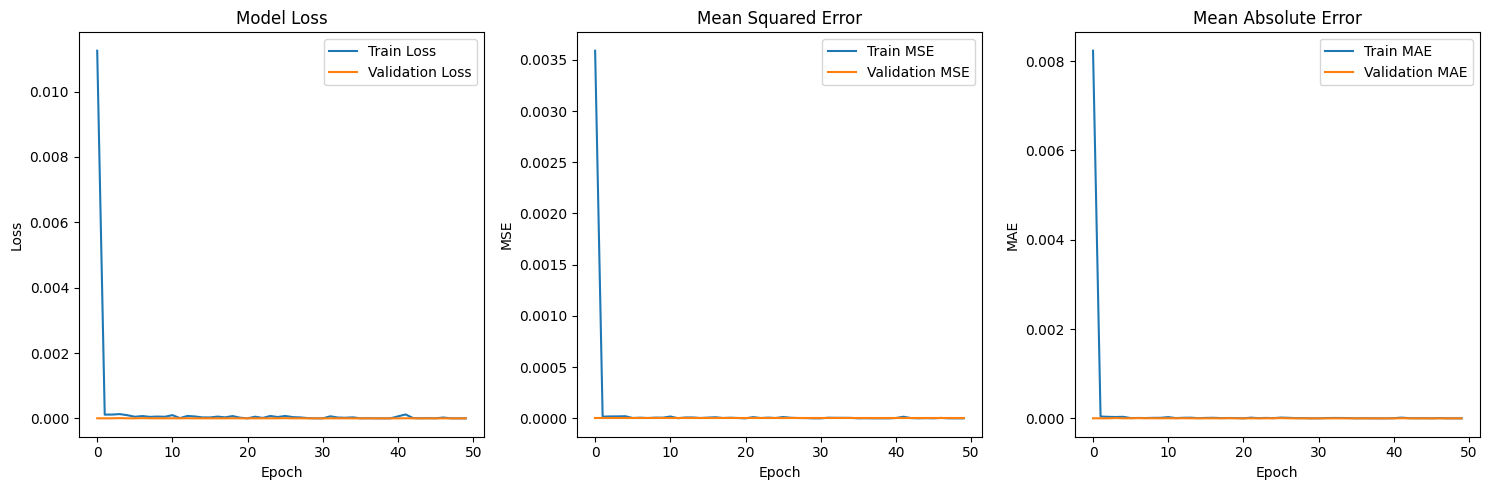

In [23]:
import matplotlib.pyplot as plt

# Visualizing the loss, MSE, and MAE
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [22]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)

# End time
end_time = time.time()

# Total AES time
total_time = end_time - start_time  

# AES per sample
aes_per_sample = (total_time / len(X_test)) * 1e6  # Convert to microseconds (µs)

print(f'Total AES Time: {total_time:.6f} seconds')
print(f'AES Time per Sample: {aes_per_sample:.2f} µs/sample')


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Total AES Time: 10.883209 seconds
AES Time per Sample: 136.04 µs/sample


In [ ]:
# model.save('..//models//rnn_lstm.keras')